# seamount roms case, PV inversion

In order to perform a PV inversion, one may use potential vorticity diagnosed from velocity and density.
This potential vorticity may be different than that computed from the pressure field alone.

The result of the PV inversion will also differ.

In [1]:
import matplotlib.pyplot as plt

from utils import *

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
path_work = '/home1/datawork/aponte/seamount/'
path_output = path_work+'frompv_ybg_topdir/'
#
#path_output = path_work+'fromnc_noybg_topneu'
#path_output = path_work+'fromnc_ybg_topneu/'
#path_output = path_work+'fromnc_ybg_topdir/'

---

## look at inputs

In [3]:
ds_in = open_input(path_output) #, substract_bg=False)
f0 = ds_in.f0
ds_in

<xarray.Dataset>
Dimensions:  (x: 100, y: 150, z: 48, zw: 49)
Coordinates:
  * z        (z) float64 -98.66 -98.03 -97.34 -96.59 ... -1.293 -0.5691 -0.1148
  * x        (x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
  * y        (y) float32 99500.0 100500.0 101500.0 ... 247500.0 248500.0
    time     float32 10000000.0
    x_rho    (y, x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
    y_rho    (y, x) float32 99500.0 99500.0 99500.0 ... 248500.0 248500.0
  * zw       (zw) float64 -98.96 -98.36 -97.7 -96.97 ... -0.8977 -0.308 0.01017
    x_km     (x) float32 249.5 250.5 251.5 252.5 ... 345.5 346.5 347.5 348.5
    y_km     (y) float32 99.5 100.5 101.5 102.5 ... 245.5 246.5 247.5 248.5
Data variables:
    psi      (z, y, x) float64 -44.71 -45.64 -46.54 ... -26.15 -25.78 -25.4
    N2       (zw) float64 ...
    f        (y, x) float32 ...
    f0       float32 ...
    q        (z, y, x) float64 3.3e-09 6.856e-09 ... 1.567e-09 1.311e-09
    rho_bg   (z, y, x) float32

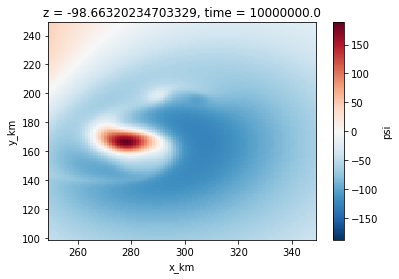

In [4]:
ds_in.psi.isel(z=0).plot(x='x_km',y='y_km')

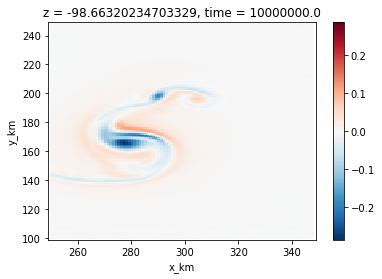

In [5]:
zeta_in = vorticity(ds_in.psi.isel(z=0))
(zeta_in/f0).plot(x='x_km',y='y_km')

---

## load outputs

In [6]:
ds_out = open_output(path_output+'output/output_full.nc', ds_in)
print(ds_out)

<xarray.Dataset>
Dimensions:  (t: 1, x: 100, y: 150, z: 48)
Coordinates:
  * z        (z) float64 -98.66 -98.03 -97.34 -96.59 ... -1.293 -0.5691 -0.1148
    time     float32 10000000.0
    x_km     (x) float32 249.5 250.5 251.5 252.5 ... 345.5 346.5 347.5 348.5
    y_km     (y) float32 99.5 100.5 101.5 102.5 ... 245.5 246.5 247.5 248.5
  * x        (x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
  * y        (y) float32 99500.0 100500.0 101500.0 ... 247500.0 248500.0
Dimensions without coordinates: t
Data variables:
    mask     (y, x) float64 ...
    psi      (t, z, y, x) float64 -44.71 -45.64 -46.54 ... -26.15 -25.78 -25.4
    q        (t, z, y, x) float64 ...
    zeta     (t, z, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    u        (t, z, y, x) float64 nan -0.000916 -0.000904 ... 0.0003751 nan
    v        (t, z, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan


---

# look at vertical slices

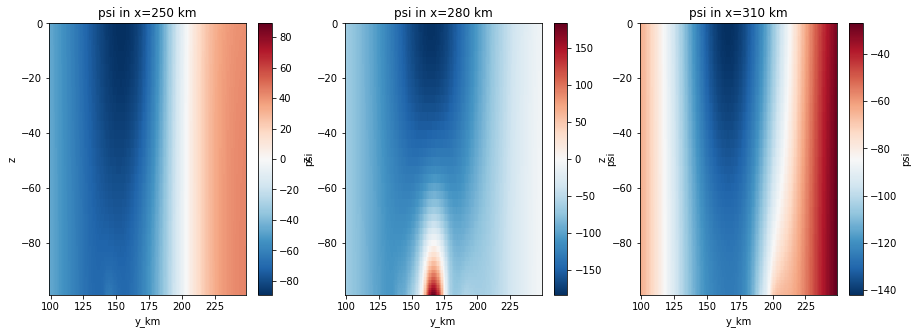

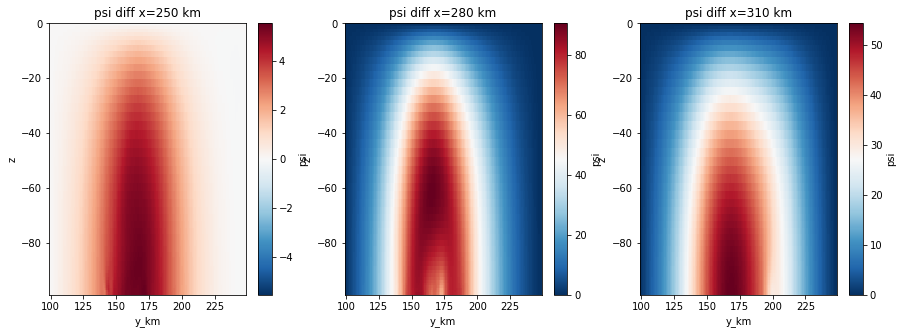

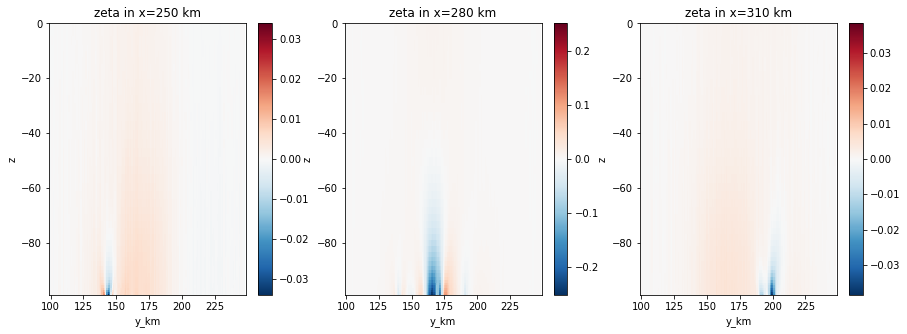

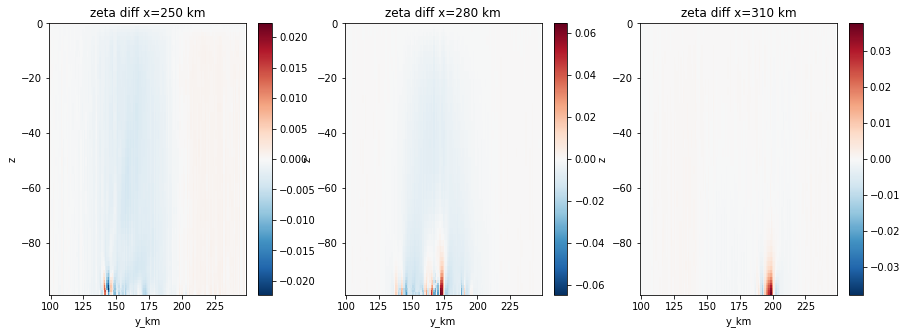

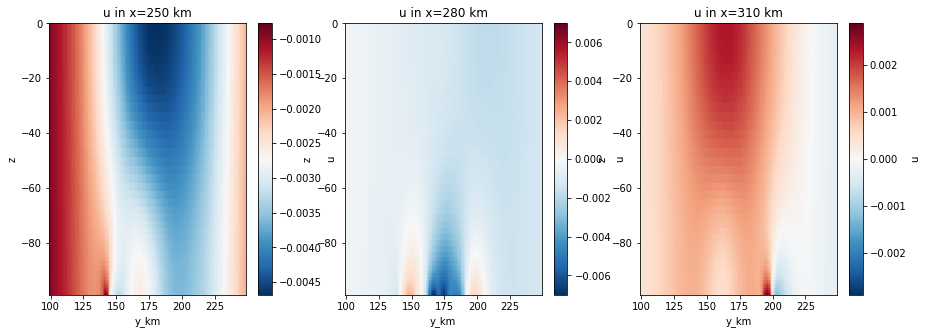

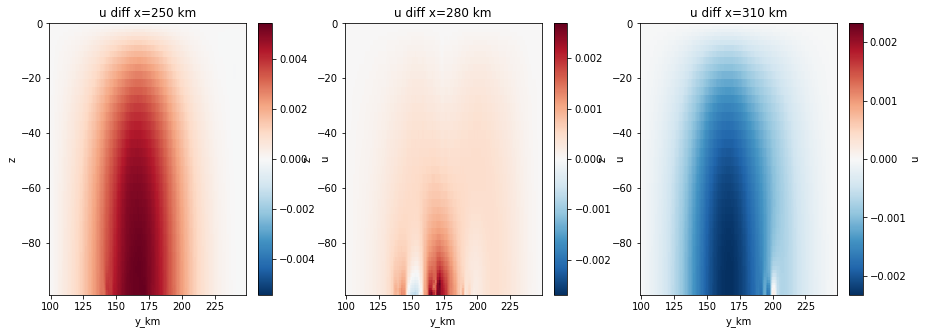

In [7]:
for v in ['psi','zeta','u']:

    fig = plt.figure(figsize=(15,5))

    iplt = 1
    #
    for ix in [1, 30, 60]:
        ax = fig.add_subplot(1,3,iplt)
        toplt = ds_in[v]
        if v=='zeta':
            toplt = toplt/f0 
        toplt.isel(x=ix).plot(ax=ax, x='y_km', y='z', cmap='RdBu_r')
        ax.set_title('%s in x=%.0f km'%(v, ds_out.x_km.isel(x=ix)))
        iplt+=1    
    
    fig = plt.figure(figsize=(15,5))

    iplt = 1    
    #
    for ix in [1, 30, 60]:
        ax = fig.add_subplot(1,3,iplt)
        toplt = (ds_out[v]-ds_in[v])
        if v=='zeta':
            toplt = toplt/f0 
        toplt.isel(x=ix).plot(ax=ax, x='y_km', y='z', cmap='RdBu_r')
        ax.set_title('%s diff x=%.0f km'%(v, ds_out.x_km.isel(x=ix)))
        iplt+=1

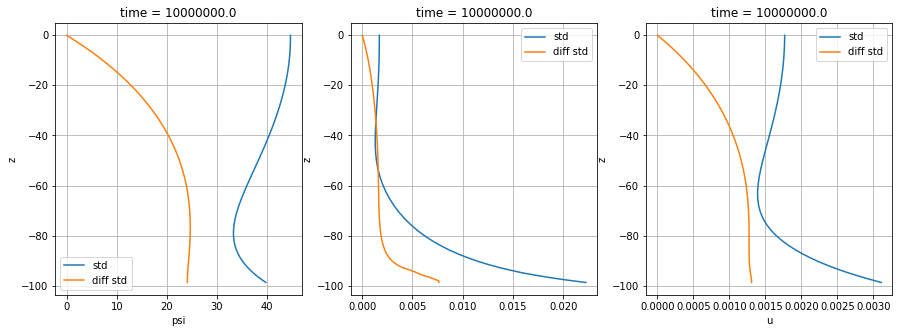

In [8]:
fig = plt.figure(figsize=(15,5))
iplt = 1    
for v in ['psi','zeta','u']:

    #
    ax = fig.add_subplot(1,3,iplt)
        
    std = ds_in[v].std(dim=['x','y'])
    diff = (ds_out[v]-ds_in[v]).std(dim=['x','y'])
    if v=='zeta':
        std = std/f0
        diff = diff/f0
    std.plot(ax=ax, y='z', label='std')
    diff.plot(ax=ax, y='z', label='diff std')
    ax.legend()
    ax.grid()
    iplt+=1

---

## horizontal maps

NameError: name 'ds_bsqg' is not defined

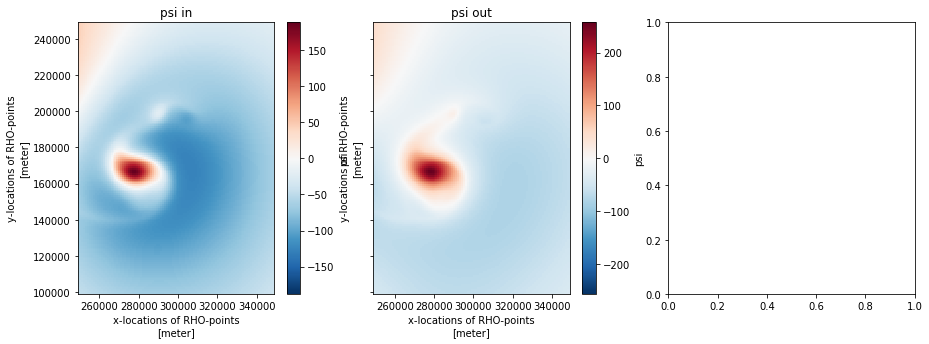

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
ds_in.psi.isel(z=0).plot(ax=ax)
ax.set_title('psi in')
ax = fig.add_subplot(1,3,2)
ds_out.psi.isel(z=0).plot(ax=ax)
ax.set_title('psi out')
ax.set_yticklabels([])
ax = fig.add_subplot(1,3,3)
ds_bsqg.psi.isel(z=0).plot(ax=ax)
ax.set_title('psi bsqg')
ax.set_yticklabels([])


# differences
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
(ds_out.psi.isel(z=0) - ds_in.psi.isel(z=0)).plot(ax=ax)
ax.set_yticklabels([])
ax.set_title('psi pv - psi_in')
ax = fig.add_subplot(1,2,2)
(ds_bsqg.psi.isel(z=0) - ds_in.psi.isel(z=0)).plot(ax=ax)
ax.set_yticklabels([])
ax.set_title('psi bsqg - psi_in')

In [ ]:
zeta_out = ds_out.zeta.isel(z=0)
zeta_bsqg = ds_bsqg.zeta.isel(z=0)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
(zeta_in/f0).plot(ax=ax)
ax = fig.add_subplot(1,3,2)
(zeta_out/f0).plot(ax=ax)
ax.set_yticklabels([])
ax = fig.add_subplot(1,3,3)
(zeta_bsqg/f0).plot(ax=ax)
ax.set_yticklabels([])

# differences
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
((zeta_out - zeta_in)/f0).plot(ax=ax)
ax.set_yticklabels([])
ax.set_title('zeta pv - zeta_in')
ax = fig.add_subplot(1,2,2)
((zeta_bsqg - zeta_in)/f0).plot(ax=ax)
ax.set_yticklabels([])
ax.set_title('zeta bsqg - zeta_in')